In [1]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import all required packages
import sklearn.datasets
import numpy as np #deal with arrays
import os
import pandas as pd #Data processing and analysis
import matplotlib.pyplot as plt #Create Graphic Design
import seaborn as sns # drawing attractive and informative statistical based on matplotlib
import warnings #avoid warning flash
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset by reading the .csv file as a pandas dataframe

df = pd.read_csv('/content/drive/MyDrive/AS1 P3/heart_failure_dataset.csv')

In [3]:
# Task

# Take a look at the first 5 samples of heart failure dataset using the method head() of a pandas dataframe
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
#show last 5 rows from dataset
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
df.shape

(299, 13)

In [6]:
df = df.drop_duplicates()# remove the doplicate rows

In [7]:
df.shape

(299, 13)

In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Form the training dataset, test dataset and futureSample set

#### Create the training and test datasets

In [5]:
# Define the input features X as all columns except 'DEATH_EVENT' column and target variable y as the "DEATH_EVENT" column
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

In [6]:
# Using train_test_split function to split the dataset into the training and test datasets, the percentage of samples in the test dataset is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Explore the training and test datasets

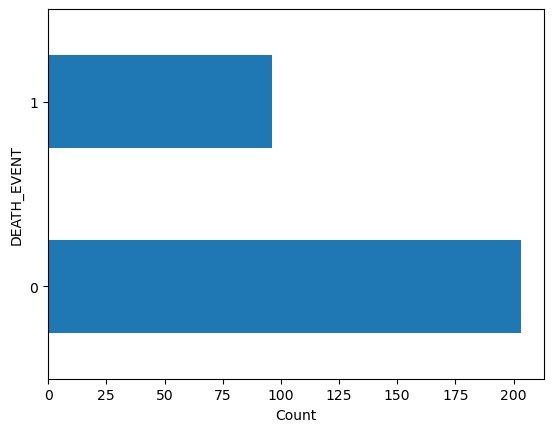

In [7]:
df['DEATH_EVENT'].value_counts().plot(kind = "barh") #Draw data horizontally
plt.xlabel("Count") # horizontal axis name
plt.ylabel("DEATH_EVENT") # vertical axis name
plt.show()

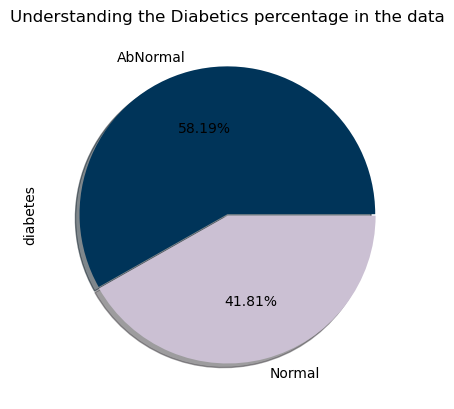

In [64]:
# Understanding the gender percentage
df['diabetes'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',explode=[0,0.01],
    labels=['AbNormal','Normal'],
    colors=['#003459','#cbc0d3'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("Understanding the Diabetics percentage in the data")
plt.show()

In [9]:
# Solution

# Set aside futureSample test datasets
# Take two samples from the testset as the future data samples, called futureSample_X, and futureSample_y,
# as the inputs from the real-world cases when the classifier is deployed.

# Get the last two samples from the test  to be the future data samples
futureSample_X = X_test[-2:]
futureSample_y = y_test[-2:]

# Remove the last two samples from the test dataset
X_test = X_test[:-2]
y_test = y_test[:-2]

### Develop a classification model by training it using the trainig dataset.

First, take the user's input for model_option which is an integer in the range of 1-5 to choose which model to develop , then develop the chosen model, called model, and lastly train the model using the training dataset.

model_option: 1- decision tree, 2- Random forest, 3-logistic regression, 4-K nearest neighbours, 5- Support vector classifier or 6 - Perceptron


If a user enters a number  >6 , print out a message "invalid option number. Try again".

In [53]:
# Solution
model_option = int(input("Choose one model from the following: 1- decision tree, 2- Random forest, 3- logistic regression, 4-K nearest neighbours, 5- Support vector classifier or 6- Perceptron \n your choice is: "))

if model_option == 1:
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(criterion = 'entropy')
    model.fit(X_train, y_train)

elif model_option == 2:
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=3, max_depth=3, max_features=4, random_state=12)
    model.fit(X_train, y_train)

elif model_option == 3:
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(max_iter=1000)  # Increase max_iter if the algorithm doesn't converge
    model.fit(X_train, y_train)

elif model_option == 4:
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)

elif model_option == 5:
    from sklearn.svm import SVC
    model = SVC(gamma='auto',probability=True)
    model.fit(X_train, y_train)
    
elif model_option == 6:
    from sklearn.linear_model import Perceptron
    model = Perceptron(penalty='elasticnet',l1_ratio=0.0)
    model.fit(X_train,y_train)

else:
    print("invalid option number. Try again")

Choose one model from the following: 1- decision tree, 2- Random forest, 3- logistic regression, 4-K nearest neighbours, 5- Support vector classifier or 6- Perceptron 
 your choice is: 6


### Evaluate a classification model

In [54]:
# Import required packages for evaluating a classification model using the test dataset
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score

In [55]:
# Solution
# Predict the class labels of samples in the test dataset
y_pred = model.predict(X_test)

In [56]:
# Solution

# Calculate the accuracy of prediction of lables of test samples using the method accuracy_score()
accuracy_test = accuracy_score(y_test, y_pred)
print (accuracy_test)

0.3448275862068966


In [57]:
# Solution

# Calculate the precision of prediction of lables of test samples using the method precision_score() in metrics
precision_test = metrics.precision_score(y_test, y_pred, average='weighted')
print (precision_test)

0.11890606420927469


In [58]:
# Solution

# calculate the recall of prediction of lables of test samples using the method recall_score() in metrics
recall_test = metrics.recall_score(y_test, y_pred, average='weighted')
print (recall_test)

0.3448275862068966


In [59]:
# Solution

# Calculate the F1-score of prediction of lables of test samples using the method f1_score() in metrics
f1_test = metrics.f1_score(y_test, y_pred, average='weighted')
print(f1_test)

0.1768346595932803


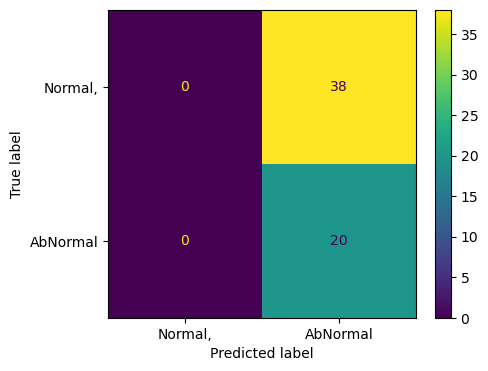

In [60]:
# Display the confusion matrix
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["Normal,", "AbNormal"])
cmp.plot(ax = ax);

In [61]:
# Present the overal report of the model's evaluation results using the method classification_report() in metrics
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.34      1.00      0.51        20

    accuracy                           0.34        58
   macro avg       0.17      0.50      0.26        58
weighted avg       0.12      0.34      0.18        58



In [62]:
# Predicted class lables the samples in the futureSample dataset
solution_validate = model.predict(futureSample_X)

In [63]:
# Calculate the prediction accuracy
score_validate = accuracy_score(solution_validate, futureSample_y)
print (score_validate)

1.0
